# Приклади використання модулів
Модулі ThreadingT.py, ThreadingV.py, example2.py призначені для розрахунку режимів обробки різьб, розрахунку основного часу на обробку різьб, вибору оптимальних режимів і методів виготовлення різьб. Їх можна використати як компоненти САПР ТП та PLM-систем різьбових деталей. Послідовність запуску документа Threading.ipynb через JupyterLite наступна:
1. Відкрийте в браузері https://jupyter.org/try-jupyter/lab/
2. Перетягніть у File Browser (зліва) файли ThreadingT.py, ThreadingV.py, example2.py, Threading.ipynb.
3. Запустіть Threading.ipynb і виконайте усі комірки (Run/Run All Cells).


## Приклад використання модуля ThreadingT
В модулі ThreadingT.py розроблено функції T1-T18, які повертають значення основного часу для різних методів виготовлення різьби. Наприклад, щоб візуально порівняти залежності T1(L), T2(L), T7(L), T8(L) і T9(L), якщо інші значення параметрів відомі, потрібно виконати команди:

<ipython-input-1-3635229eced0>:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


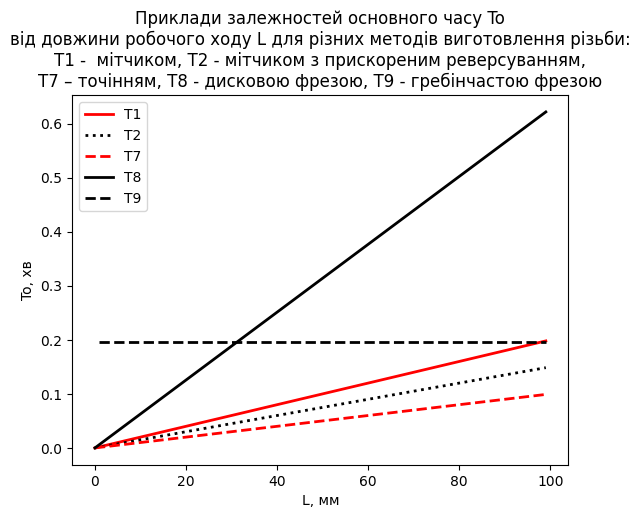

In [1]:
from ThreadingT import *
import numpy as np
import sympy, inspect
import matplotlib.pyplot as plt
import pandas as pd
L=np.arange(0.0, 100, 1)
P=1
n=1000
plt.plot(L, T1(L, P, n), 'r-', lw=2) # label='T1'
plt.plot(L, T2(L, P, n, 2000), 'k:', lw=2)
plt.plot(L, T7(L, P, n), 'r--', lw=2)
plt.plot(L, T8(L, P, 5000, 10), 'k-', lw=2)
plt.plot(L, T9(10, 0.5, 4, 100)*L/L, 'k--', lw=2) # *P/P потрібне для масиву
plt.xlabel("L, мм"); plt.ylabel("To, хв");
plt.legend([f for f in "T1 T2 T7 T8 T9".split()])
#plt.legend(['$'+fn2latex(f)+'$' for f in (T1,T2,T7,T8,T9)])
plt.title('''Приклади залежностей основного часу To
від довжини робочого ходу L для різних методів виготовлення різьби:
T1 -  мітчиком, T2 - мітчиком з прискореним реверсуванням,
T7 – точінням, T8 - дисковою фрезою, T9 - гребінчастою фрезою''')
plt.show()

Щоб візуально порівняти залежності T1(P), T2(P), T7(P), T8(P) і T9(P), якщо інші значення параметрів відомі, потрібно виконати команди:

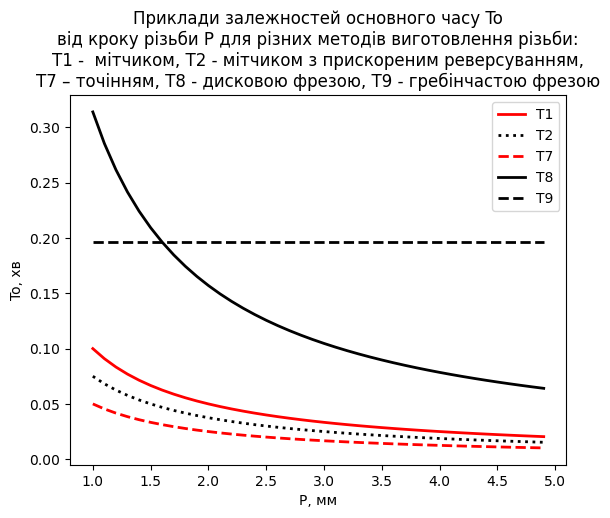

In [2]:
L=50
P=np.arange(1, 5, 0.1)
plt.plot(P, T1(L, P, n), 'r-', lw=2)
plt.plot(P, T2(L, P, n, 2000), 'k:', lw=2)
plt.plot(P, T7(L, P, n), 'r--', lw=2)
plt.plot(P, T8(L, P, 5000, 10), 'k-', lw=2)
plt.plot(P, T9(10, 0.5, 4, 100)*P/P, 'k--', lw=2) # *P/P потрібне для масиву
plt.legend([f for f in "T1 T2 T7 T8 T9".split()])
plt.xlabel("P, мм"); plt.ylabel("To, хв")
plt.title('''Приклади залежностей основного часу To
від кроку різьби P для різних методів виготовлення різьби:
T1 -  мітчиком, T2 - мітчиком з прискореним реверсуванням,
T7 – точінням, T8 - дисковою фрезою, T9 - гребінчастою фрезою''')
plt.show()

## Приклади використання модуля example2
Розроблений модуль example2.py містить засоби перетворення Python-функцій у рівняння SymPy та формули LaTeX, а також засоби символьного розв'язування рівнянь, ліва частина яких є Python-функцією. Нижче наведено приклади його використання.

In [3]:
from example2 import *
# В Jupyter може знадобитись перетворити функцію у формулу LaTeX
fn2latex(T7)

'T_{7} = \\frac{L g i}{P n}'

In [4]:
# Розширена документація по функції з формулою LaTeX
fndoc(T7)

'Повертає основний час для точіння різьби, хв\n$T_{7} = \\frac{L g i}{P n}$'

In [5]:
from ThreadingT import __doc__ # документація модуля
# розширити документацію функцій Ti описом аргументів
for f in [T1, T2, T3, T4, T5, T6, T7, T8, T9, T10, T11, T12, T13, T14, T15, T16, T17, T18]:
    f.__doc__+="\n\n$$"+fn2latex(f)+"$$\n"
    extdoc(f, doc2dict(__doc__))

In [6]:
# вивести розширену документацію функції T7
from IPython.display import display, Markdown
display(Markdown(T7.__doc__))

Повертає основний час для точіння різьби, хв

$$T_{7} = \frac{L g i}{P n}$$

L - довжина робочого ходу, мм;
P - крок різьби, мм;
n - частота обертання заготовки або інструменту, хв
g - число заходів різьби, що нарізується;
i - число робочих ходів інструмента;

In [7]:
# Функцію T7 можна перетворити в SymPy-рівняння
fn2sympy(T7)

Eq(T7, L*g*i/(P*n))

In [8]:
# або уточнивши значення змінної P
fn2sympy(T7, P=2)

Eq(T7, L*g*i/(2*n))

In [9]:
# Знайдемо значення n з рівняння T7(L=10, P=2, n, g=1, i=1)=0.1
fn_solve(T7, 0.1, L=10, P=2, g=1, i=1)

[50.0000000000000]

In [10]:
# Отримаємо вираз для обчислення n, якщо P є символом
fn_solve(T7, 0.1, L=10, P=sympy.S("P"), g=1, i=1)

[100.0/P]

In [11]:
# Знайдемо вирази для обчислення значень L та P, за яких методи T7 та T9 забезпечують однаковий основний час.
# Спочатку створимо рівняння для T7
eq1=fn2sympy(T7)
eq1

Eq(T7, L*g*i/(P*n))

In [12]:
# Тепер створимо рівняння для T9
eq2=fn2sympy(T9)
eq2

Eq(T9, 3.925*d/(S_z*Z*n_i))

In [13]:
# Розв’яжемо рівняння T7=T9 відносно L
sol=sympy.solve(sympy.Eq(eq1.rhs, eq2.rhs), "L")
sol

[3.925*P*d*n/(S_z*Z*g*i*n_i)]

In [14]:
# Розв’яжемо рівняння T7=T9 відносно P
sol=sympy.solve(sympy.Eq(eq1.rhs, eq2.rhs), "P")
sol

[0.254777070063694*L*S_z*Z*g*i*n_i/(d*n)]

## Приклади використання модуля ThreadingV
Модуль ThreadingV призначено для обчислення та порівняння  швидкостей різання для різних методів різьбонарізання.

In [15]:
from ThreadingV import *
# Виведемо документацію до функції V1
V1.__doc__

'Швидкість різання машинними мітчиками зі сталі Р6М5 [Якухин, т.38].\n    Більше значення треба приймати для різьб з більшими діаметрами і меньшими кроками\n    D - діаметр різьби, мм\n    P - крок, мм,\n    m - матеріал\n    k1 - матеріал\n    k2 - ступінь точності\n    НВ - твердість чавуну\n    Приклад:\n    V1(5, 1, "Сталь конструкційна", "Сталь нормалізована", 6)\n    V1()\n    '

In [16]:
# Розрахуємо швидкість різання
V1(D=5, P=1, m="Сталь конструкційна", k1="Сталь нормалізована", k2=6)

array([8., 5.])

In [17]:
# усі дані
V1()

({'Сталь конструкційна': {(3, 6): (8, 5),
   (8, 10): (12, 6),
   (12, 16): (16, 8),
   (18, 27): (18, 10),
   (30, 39): (20, 10),
   (42, 48): (24, 10)},
  'Сталь корозостійка та жароміцна': {(3, 6): (5, 3),
   (8, 10): (6, 4),
   (12, 16): (8, 6),
   (18, 27): (10, 7)},
  'Чавун': {(3, 6): (6, 3),
   (8, 10): (8, 5),
   (12, 16): (10, 6),
   (18, 27): (11, 6),
   (30, 39): (12, 7)},
  'Кольорові сплави': {(3, 6): (10, 6),
   (8, 10): (12, 8),
   (12, 16): (16, 10),
   (18, 27): (18, 12),
   (30, 39): (20, 14),
   (42, 48): (24, 15)},
  'Термореактивні пластмасси': {(3, 6): (1, 5),
   (8, 10): (1.5, 7),
   (12, 16): (2, 9),
   (18, 27): (2, 12)}},
 {'Сталь нормалізована': 1,
  'Сталь покращена': 0.85,
  'Сталь автоматна': 1.15,
  'Сталь маловуглецева': 0.825,
  'Сталь легована нормалізована': 0.9,
  'Сталь легована покращена': 0.7,
  'Сталь корозійно-стійка': 0.75,
  'Жароміцні сталі та сплави': 0.25,
  'Жаростійкі сталі та сплави': 0.25,
  'Бронза': 1.0,
  'Латунь': 1.2,
  'Алюміній'

In [18]:
# Функція V1pd є аналогом V1, але використовує Pandas для більш зручних запитів
V=V1pd()
# Швидкість для діаметрів 3-6 і матеріалу "Сталь конструкційна"
V[V.D==(3,6)]["Сталь конструкційна"]

0    (8, 5)
Name: Сталь конструкційна, dtype: object

In [19]:
# В якому діапазоні діаметрів є значення 5?
V.D[ [i<5<j for i,j in V.D] ]

0    (3, 6)
Name: D, dtype: object

In [20]:
# Швидкість для діаметру 5 і матеріалу "Сталь конструкційна"
V["Сталь конструкційна"][ [i<5<j for i,j in V.D] ]

0    (8, 5)
Name: Сталь конструкційна, dtype: object

Побудуємо граничні залежності, які можна використати для зручного вибору режимів різання.

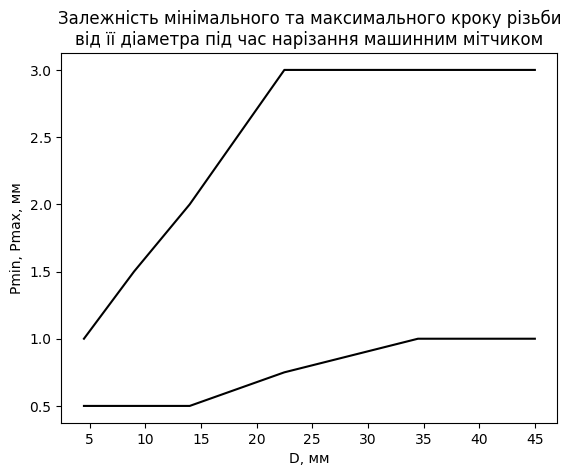

In [21]:
X=(V['Dmax']+V['Dmin'])/2
plt.plot(X.values, V['Pmin'].values, 'k-')
plt.plot(X.values, V['Pmax'].values, 'k-')
plt.xlabel('D, мм'); plt.ylabel('Pmin, Pmax, мм')
plt.title("""Залежність мінімального та максимального кроку різьби
від її діаметра під час нарізання машинним мітчиком""")
plt.show()

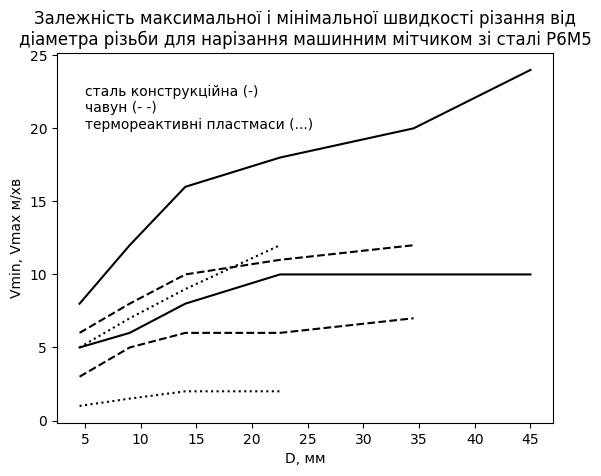

In [22]:
plt.plot(X.values, V['Сталь конструкційнаmin'].values, 'k-')
plt.plot(X.values, V['Сталь конструкційнаmax'].values, 'k-')
plt.plot(X.values[:-1], V['Чавунmin'].values[:-1], 'k--')
plt.plot(X.values[:-1], V['Чавунmax'].values[:-1], 'k--')
plt.plot(X.values[:-2], V['Термореактивні пластмассиmin'].values[:-2], 'k:')
plt.plot(X.values[:-2], V['Термореактивні пластмассиmax'].values[:-2], 'k:')
plt.xlabel('D, мм'); plt.ylabel('Vmin, Vmax м/хв')
plt.title("""Залежність максимальної і мінімальної швидкості різання від
діаметра різьби для нарізання машинним мітчиком зі сталі Р6М5""")
plt.text(5,20,"""сталь конструкційна (-)
чавун (- -)
термореактивні пластмаси (...)""")
plt.show()

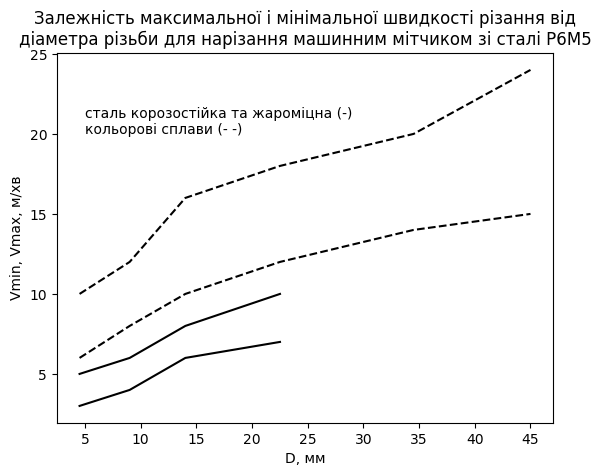

In [23]:
plt.plot(X.values[:-2], V['Сталь корозостійка та жароміцнаmin'].values[:-2], 'k-')
plt.plot(X.values[:-2], V['Сталь корозостійка та жароміцнаmax'].values[:-2], 'k-')
plt.plot(X.values, V['Кольорові сплавиmin'].values, 'k--')
plt.plot(X.values, V['Кольорові сплавиmax'].values, 'k--')
plt.xlabel('D, мм'); plt.ylabel('Vmin, Vmax, м/хв')
plt.title("""Залежність максимальної і мінімальної швидкості різання від
діаметра різьби для нарізання машинним мітчиком зі сталі Р6М5""")
plt.text(5,20,"""сталь корозостійка та жароміцна (-)
кольорові сплави (- -)""")
plt.show()